# Linear Regression and Random Forest for predicting Car Price

Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

In this notebook, we will see how to build a regression model using both Linear model and Random forest for predicting Car Price.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\JohnVinodhA\\Downloads\\Carprice.csv')

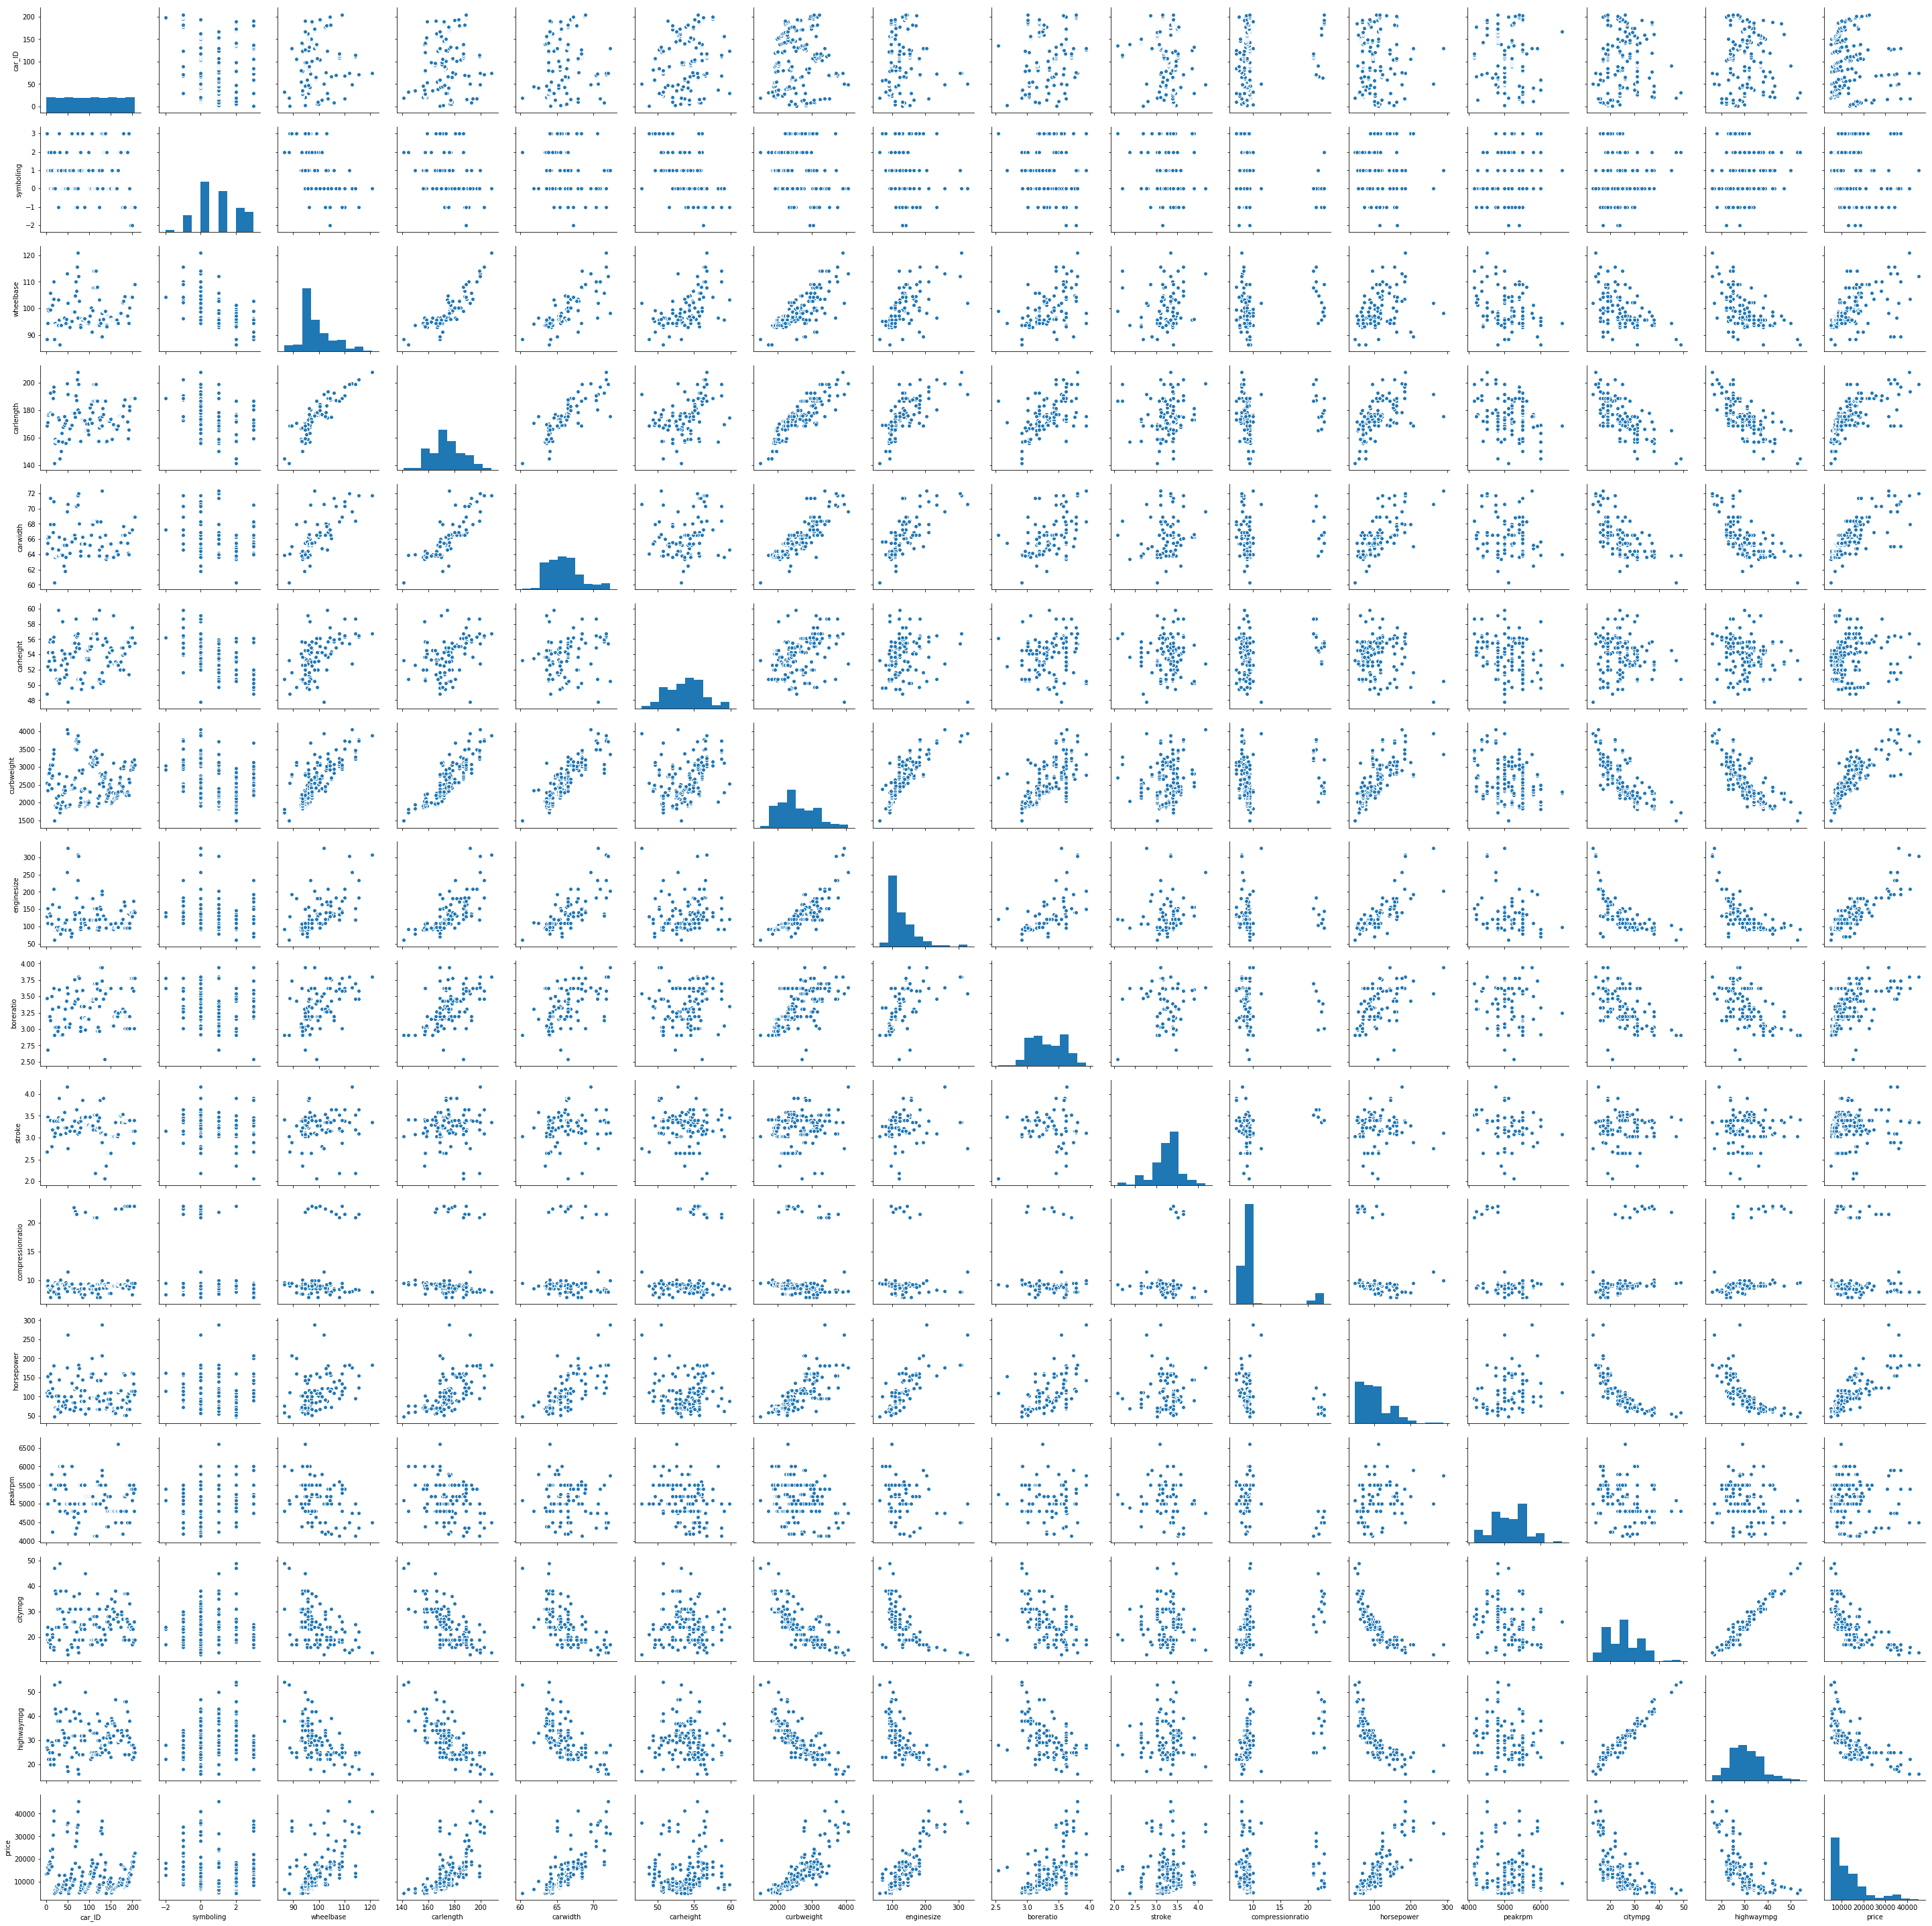

In [3]:
sns.pairplot(data)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


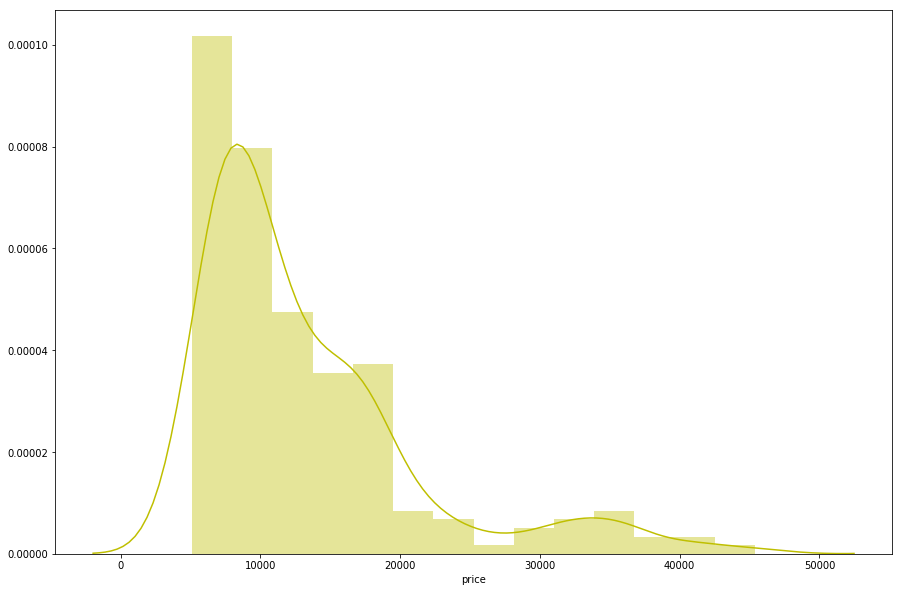

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.distplot(data['price'],color="y")

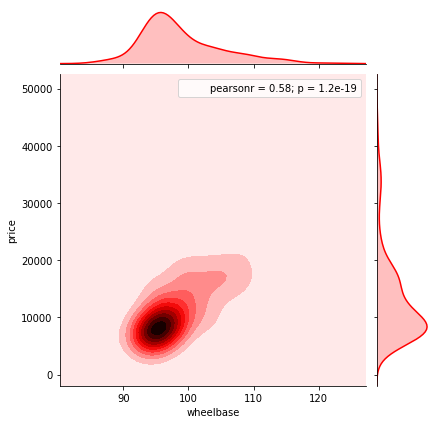

In [5]:
sns.jointplot(x="wheelbase",y="price",data=data,kind='kde',color='red')

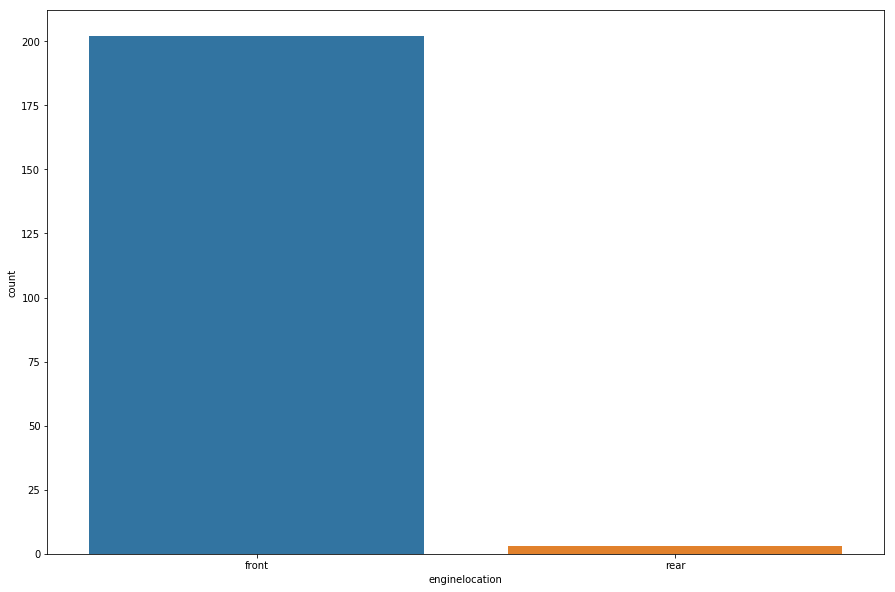

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(data['enginelocation'])

The info() will provide details about the data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Encoding

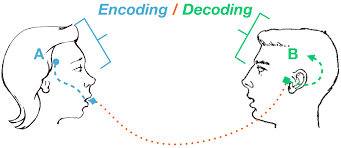
<br>
This is one of the most common things that we perform in datasets.In Data Science and Machine Learning,we use encoding to convert categorical data into integers.Some of the most common ways for encoding are:

* OneHotEncoder

* LabelEncoder

* pandas.get_dummies

Here, i will be using LabelEncoder which i found the simplest among the mentioned three


In [9]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['fuelsystem']=lab.fit_transform(data['fuelsystem'])
data['cylindernumber']=lab.fit_transform(data['cylindernumber'])
data['enginetype']=lab.fit_transform(data['enginetype'])
data['enginelocation']=lab.fit_transform(data['enginelocation'])
data['drivewheel']=lab.fit_transform(data['drivewheel'])
data['carbody']=lab.fit_transform(data['carbody'])
data['doornumber']=lab.fit_transform(data['doornumber'])
data['aspiration']=lab.fit_transform(data['aspiration'])
data['fueltype']=lab.fit_transform(data['fueltype'])
data['CarName']=lab.fit_transform(data['CarName'])

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# Handling outliers

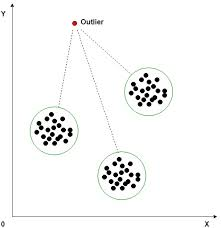

<br>

Outliers are the values which lie out of a certain range in which it should be.

For ex., consider :
```
a=[10,20,30,100000,40]
```

Here, 100000 can be treated as outlier in a,because of a huge difference with other data points.

There are many ways of doing so.Some of them are:

* Z-score
* IQR(interquartile range )
* Rank

I will be using a rank method here to deal with outliers.

I will also use Boxplot to show the outliers in a column.(**dots in boxplot represent outliers**)

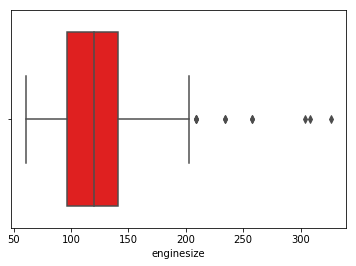

In [12]:
sns.boxplot(data['enginesize'],color='red')

In [17]:
data['enginesize']=data['enginesize'].rank()


# After rank method

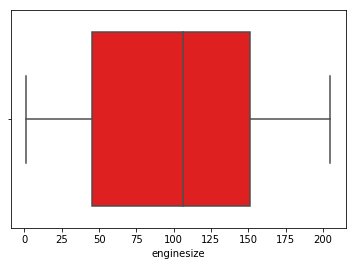

In [14]:
sns.boxplot(data['enginesize'],color='red')

After the rank method, we can see that there are no outliers in that column.Thus,one can deal with outliers in the same way

# Correlation Matrix

A correlation matrix is used to find correlation between each column in dataset.I will show two ways to plot a correlation matrix

In [18]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1,-0.151621,0.967077,-0.125568,0.0677288,-0.190352,0.098303,0.0514065,0.0514834,0.129729,0.170636,0.0523866,0.25596,0.0719616,-0.0751299,-0.0409116,0.0891316,0.204898,0.260064,-0.160824,0.150276,-0.0150056,-0.203789,0.01594,0.0112553,-0.109093
symboling,-0.151621,1,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.0416715,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.0503724,0.197762,-0.130244,0.0911631,-0.130051,-0.00873514,-0.178515,0.0708727,0.273606,-0.0358226,0.034606,-0.0799782
CarName,0.967077,-0.107095,1,-0.069435,0.0199144,-0.171745,0.0996911,-0.0161286,0.0559681,0.0145496,0.0530156,-0.0753494,0.2019,-0.049407,-0.0903809,0.0471535,-0.0256293,0.123845,0.188598,-0.181775,0.10173,-0.0921313,-0.138309,0.0934372,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1,-0.401397,0.191491,-0.147853,-0.132257,0.0400695,-0.308346,-0.212679,-0.23388,-0.284631,-0.217275,0.0826953,0.110617,-0.132254,0.0415291,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.0677288,-0.059866,0.0199144,-0.401397,1,-0.0317918,0.0630279,0.0664647,-0.0571915,0.257611,0.234539,0.300567,0.0873111,0.324902,-0.102963,-0.133119,0.231432,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.0317918,1,-0.680358,0.0989544,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.0624313,0.154322,-0.0838975,0.015519,-0.119258,0.0110816,-0.177888,0.126947,0.247668,0.0124167,0.0363298,-0.0318353
carbody,0.098303,-0.596135,0.0996911,-0.147853,0.0630279,-0.680358,1,-0.155745,-0.277009,0.401362,0.334433,0.13171,0.568534,0.128467,-0.037024,-0.0484081,-0.0396761,-0.0650786,0.0105493,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.00717035,-0.0839757
drivewheel,0.0514065,-0.0416715,-0.0161286,-0.132257,0.0664647,0.0989544,-0.155745,1,0.147865,0.459745,0.485649,0.470751,-0.0197188,0.575111,-0.116823,0.223238,0.539071,0.424686,0.481827,0.0715906,0.127479,0.518686,-0.0394169,-0.449581,-0.45222,0.577992
enginelocation,0.0514834,0.212471,0.0559681,0.0400695,-0.0571915,0.137757,-0.277009,0.147865,1,-0.18779,-0.0509885,-0.0516976,-0.106234,0.0504682,0.114127,0.135541,0.18556,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.0145496,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.18779,1,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.590339,0.384601,0.48875,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


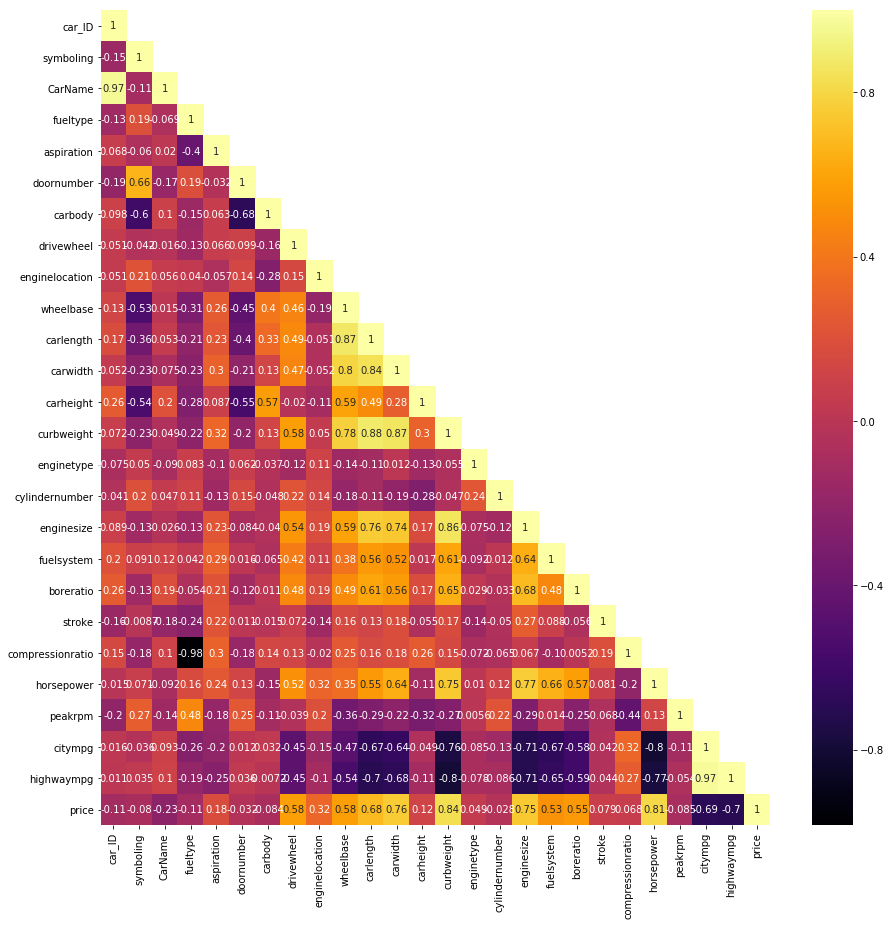

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='inferno',mask=np.triu(data.corr(),k=1))

# Building a Machine Learning Model

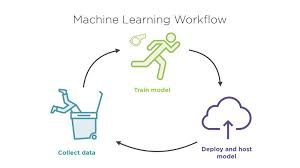

<br>

Here we will perform tasks like splitting the data,applying machine learning algorithms and predict the output.

The best performing models for most of time are:

* RandomForest
* XGBoost
* Lightgbm

***If the dataset contains features some of which are Categorical Variables and some of the others are continuous variable Decision Tree is better than Linear Regression,since Trees can accurately divide the data based on Categorical Variables.*** 

#### Linear Regression

In [92]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
x=data.drop(['car_ID','price'],axis=1)
y=data['price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1)

In [68]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(xtrain,ytrain)

In [69]:
predictions = lm.predict(xtest)
print(predictions)

[ 9764.9316515  20096.61529568 10314.52716814 10483.06585623
 32496.82507301  7304.20334583 11197.55162253  7107.47895279
  4710.88406953  7191.64066605 19180.64096809 15798.46101172
  8148.64822432 34904.43635422  9589.78402344 18175.28933501
 19595.08565319  7305.51057683 15858.59448639  9850.77516046
 18448.49306979]


In [67]:
lm.score(xtest,ytest)
#This value si the Rsquare of our model

0.8938181276515396

This is the R² score of our model. As you probably remember, this the percentage of explained variance of the predictions.

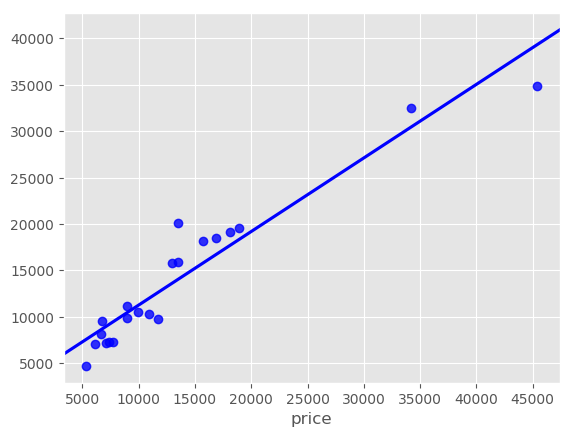

In [78]:
sns.regplot(x=ytest, y=predictions, ci=None, color="b")

#### Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.pipeline import make_pipeline

In [93]:
mod=RandomForestRegressor(n_estimators=100)
model=make_pipeline(mod)
print(model)
kfold=KFold(n_splits=5)
model.fit(x,y)
score=cross_val_score(model,x,y,cv=kfold)

Pipeline(memory=None,
     steps=[('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])


In [94]:
yp=model.predict(xt)
yp

array([ 9098.15   ,  9972.46   , 13186.17   , 12957.11   ,  7814.65   ,
       17875.41334,  6833.385  ,  7202.08   , 16637.35501,  9879.86   ,
       15220.69   , 21632.01169,  9866.24   ,  7386.91   , 13697.39   ,
       12960.25   , 12364.92   ,  8744.79   ,  7197.09   ,  9242.29   ,
        6846.23   ])

In [65]:
print(r2_score(yt,yp))
print(mean_squared_error(yt,yp))
print(mean_squared_log_error(yt,yp))

0.967493781064956
631689.4329486149
0.002798333589169371


**As you see from the R square score, random forest performs better than the Linear model and this is because of the feature types.**

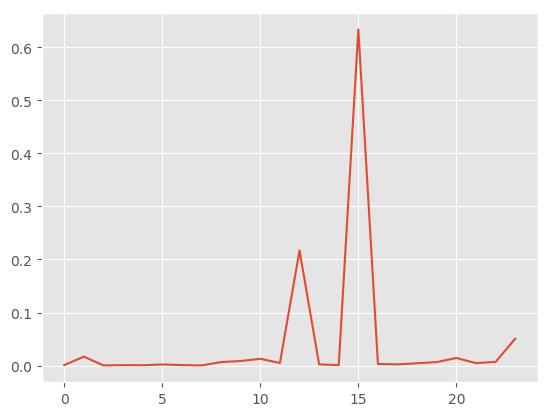

In [121]:
#Feature importance
features=xtest
importances = mod.feature_importances_
cols =list(xtrain.columns.values)
plt.figure
plt.plot(importances)


In [123]:
pd.DataFrame(cols)

,0
0,symboling
1,CarName
2,fueltype
3,aspiration
4,doornumber
5,carbody
6,drivewheel
7,enginelocation
8,wheelbase
9,carlength


#### Interestingly, the engine size of the car has the most affect on Price.

# Saving models in ML 

In [28]:
import pickle

pkl_path = "./Car.pkl"
with open(pkl_path, "wb") as f:
    pickle.dump(model, f)

In [29]:
import pickle
pkl_path = './Car.pkl'
with open(pkl_path, 'rb') as f:
    model = pickle.load(f)

# Thanks for viewing this

<img src="https://media0.giphy.com/media/3oEdva9BUHPIs2SkGk/giphy.gif">

